In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
litcovid_dataset = pd.read_csv('/content/drive/MyDrive/Biocreative/Biocreative/datasets/BC7-LitCovid-Dev.csv')

In [ ]:
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label
0,32653511,Free Radic Biol Med,Potential benefits and risks of omega-3 fatty ...,"Studies have shown that infection, excessive c...",dha;epa;inflammation;oxidative stress;sars-cov...,"Journal Article;Research Support, Non-U.S. Gov...","Rogero, Marcelo M;Leao, Matheus de C;Santana, ...",10.1016/j.freeradbiomed.2020.07.005,Treatment
1,32427104,JMIR Public Health Surveill,Modeling COVID-19 Latent Prevalence to Assess ...,BACKGROUND: Emergence of the coronavirus disea...,covid-19;sir model;detection probability;forec...,Journal Article,"Turk, Philip J;Chou, Shih-Hsiung;Kowalkowski, ...",10.2196/19353,Prevention;Epidemic Forecasting
2,32605414,Int J Health Serv,The U.S. Health Care System on the Eve of the ...,Four decades of neoliberal health policies hav...,covid-19;united states;health care;health ineq...,Journal Article,"Himmelstein, David U;Woolhandler, Steffie",10.1177/0020731420937631,Prevention
3,33066278,Molecules,High-Throughput Screening for Inhibitors of th...,The global SARS-CoV-2 pandemic started late 20...,3clpro;covid-19;sars-cov-2;apomorphine;aporphi...,Journal Article,"Brown, Alistair S;Ackerley, David F;Calcott, M...",10.3390/molecules25204666,Treatment;Mechanism
4,32303609,Gut,COVID-19 and immunomodulation in IBD.,The current coronavirus pandemic is an ongoing...,cytokines;inflammation;inflammatory bowel disease,Journal Article;Review,"Neurath, Markus F",10.1136/gutjnl-2020-321269,Treatment;Mechanism


In [ ]:
# list of original columns:
Columns = list(litcovid_dataset.columns)
Columns

['pmid',
 'journal',
 'title',
 'abstract',
 'keywords',
 'pub_type',
 'authors',
 'doi',
 'label']

In [ ]:
# Total articles:
Length = litcovid_dataset['abstract'].shape[0]
print(f'# of articles: {Length}')

# of articles: 6239


In [ ]:
# Selecting first row:
litcovid_dataset.iloc[0]

pmid                                                 32653511
journal                                   Free Radic Biol Med
title       Potential benefits and risks of omega-3 fatty ...
abstract    Studies have shown that infection, excessive c...
keywords    dha;epa;inflammation;oxidative stress;sars-cov...
pub_type    Journal Article;Research Support, Non-U.S. Gov...
authors     Rogero, Marcelo M;Leao, Matheus de C;Santana, ...
doi                       10.1016/j.freeradbiomed.2020.07.005
label                                               Treatment
Name: 0, dtype: object

In [ ]:
# shape of dataframe
litcovid_dataset.shape

(6239, 9)

In [ ]:
# Report missing values
litcovid_dataset.isna().sum()

pmid           0
journal        0
title          0
abstract       0
keywords    1485
pub_type       0
authors       27
doi          139
label          0
dtype: int64

In [ ]:
import numpy as np

# Average length of articles:
# litcovid_dataset(pmid: abstract)
articles = pd.Series(litcovid_dataset.abstract.values,index=litcovid_dataset['pmid']).to_dict()

# litcovid_dataset(pmid: len(abstarct))
length =  dict((key, len(articles[key])) for key in articles.keys())

length_list = [values for key, values in length.items()]
length_list = np.array(length_list)

print(f'average length of abstract articles {np.mean(length_list)}')
print(f'max length of articles: {np.max(length_list), np.argmax(length_list)}')
print(f'min length of articles: {np.min(length_list), np.argmin(length_list)}')

average length of abstract articles 1390.8224074370892
max length of articles: (9176, 5652)
min length of articles: (1, 2391)


In [ ]:
word_length = [len(value.split(' ')) for key, value in articles.items()]
word_length = np.array(word_length)

print(f'average word length of abstract articles {np.mean(word_length)}')
print(f'max word length of articles: {np.max(word_length), np.argmax(word_length)}')
print(f'min word length of articles: {np.min(word_length), np.argmin(word_length)}')

average word length of abstract articles 201.21061067478763
max word length of articles: (1310, 5652)
min word length of articles: (1, 674)


In [ ]:
sorted_indices = np.argsort(word_length)
sorted_list = word_length[sorted_indices]
print(f'Top k largest word length articles: {sorted_list[-10:]}')

Top k largest word length articles: [ 870  918  925  929  997  997 1000 1112 1164 1310]


In [ ]:
count = 0
for i in sorted_list:
  if i > 512:
    count+=1
  
print(f'Value that will be deprecated during tokenzation of abstract articles: {count}')

Value that will be deprecated during tokenzation of abstract articles: 38


In [ ]:
litcovid_dataset.loc[4568, 'abstract']

'Background: Due to supply chain disruption, the COVID-19 pandemic has caused severe shortages in personal protective equipment for health care professionals. Local fabrication based on 3D printing is one way to address this challenge, particularly in the case of products such as protective face shields. No clear path exists, however, for introducing a locally fabricated product into a clinical setting. Methods: We describe a research protocol under Institutional Review Board supervision that allowed clinicians to participate in an iterative design process followed by real-world testing in an emergency department. All designs, materials used, testing protocols, and survey results are reported in full to facilitate similar efforts in other clinical settings. Findings: Clinical testing allowed the incident command team at a major academic medical center to introduce the locally fabricated face shield into general use in a rapid but well-controlled manner. Unlike standard hospital face sh

In [ ]:
litcovid_dataset.loc[3479, 'abstract']

"BACKGROUND: Convalescent plasma and hyperimmune immunoglobulin may reduce mortality in patients with respiratory virus diseases, and are currently being investigated in trials as a potential therapy for coronavirus disease 2019 (COVID-19). A thorough understanding of the current body of evidence regarding the benefits and risks is required. OBJECTIVES: To assess whether convalescent plasma or hyperimmune immunoglobulin transfusion is effective and safe in the treatment of people with COVID-19. SEARCH METHODS: The protocol was pre-published with the Center for Open Science and can be accessed here: osf.io/dwf53 We searched the World Health Organization (WHO) COVID-19 Global Research Database, MEDLINE, Embase, Cochrane COVID-19 Study Register, Centers for Disease Control and Prevention COVID-19 Research Article Database and trials registries to identify ongoing studies and results of completed studies on 23 April 2020 for case-series, cohort, prospectively planned, and randomised contro

In [ ]:
# Labels
Labels = pd.Series([labels.split(';') for labels in list(litcovid_dataset.label)],index=litcovid_dataset['pmid']).to_dict()

In [ ]:
# list all unique labels 
labels = []

for key, values in Labels.items():
  for label in values:
    if label not in labels:
      labels.append(label)
    
print(labels)

['Treatment', 'Prevention', 'Epidemic Forecasting', 'Mechanism', 'Diagnosis', 'Case Report', 'Transmission']


In [ ]:
# applying sklearn preprocessing.LabelEncoder()
from sklearn import preprocessing

Le = preprocessing.LabelEncoder()
Le.fit(['Treatment', 'Mechanism', 'Prevention', 'Case Report', 'Diagnosis', 'Transmission', 'Epidemic Forecasting'])
list(Le.classes_)

# Encoded version of Labels 
Encoded_labels = dict((key, Le.transform(values).tolist()) for key, values in Labels.items())

y = [tuple(values) for key, values in Encoded_labels.items()]

# Onehot encoding
from sklearn.preprocessing import MultiLabelBinarizer

onehot = MultiLabelBinarizer()

Encodings = onehot.fit_transform(y)

class_mappings = dict(zip(Le.classes_, onehot.classes_))

In [ ]:
litcovid_dataset.shape, Encodings.shape

((6239, 9), (6239, 7))

In [ ]:
# bifurcating classes

for key in class_mappings.keys():

  # Assigning new columns as labels and their respective boolean values
  # litcovid_dataset.insert(, key, Encodings[:, class_mappings[key]])
  litcovid_dataset[key] = Encodings[:, class_mappings[key]]

# Added 6 extra columns for different lables
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32653511,Free Radic Biol Med,Potential benefits and risks of omega-3 fatty ...,"Studies have shown that infection, excessive c...",dha;epa;inflammation;oxidative stress;sars-cov...,"Journal Article;Research Support, Non-U.S. Gov...","Rogero, Marcelo M;Leao, Matheus de C;Santana, ...",10.1016/j.freeradbiomed.2020.07.005,Treatment,0,0,0,0,0,0,1
1,32427104,JMIR Public Health Surveill,Modeling COVID-19 Latent Prevalence to Assess ...,BACKGROUND: Emergence of the coronavirus disea...,covid-19;sir model;detection probability;forec...,Journal Article,"Turk, Philip J;Chou, Shih-Hsiung;Kowalkowski, ...",10.2196/19353,Prevention;Epidemic Forecasting,0,0,1,0,1,0,0
2,32605414,Int J Health Serv,The U.S. Health Care System on the Eve of the ...,Four decades of neoliberal health policies hav...,covid-19;united states;health care;health ineq...,Journal Article,"Himmelstein, David U;Woolhandler, Steffie",10.1177/0020731420937631,Prevention,0,0,0,0,1,0,0
3,33066278,Molecules,High-Throughput Screening for Inhibitors of th...,The global SARS-CoV-2 pandemic started late 20...,3clpro;covid-19;sars-cov-2;apomorphine;aporphi...,Journal Article,"Brown, Alistair S;Ackerley, David F;Calcott, M...",10.3390/molecules25204666,Treatment;Mechanism,0,0,0,1,0,0,1
4,32303609,Gut,COVID-19 and immunomodulation in IBD.,The current coronavirus pandemic is an ongoing...,cytokines;inflammation;inflammatory bowel disease,Journal Article;Review,"Neurath, Markus F",10.1136/gutjnl-2020-321269,Treatment;Mechanism,0,0,0,1,0,0,1


In [ ]:
# Labels Stats:
labels_dataframe = litcovid_dataset.filter(['Case Report', 'Diagnosis',	'Epidemic Forecasting',	'Mechanism',	'Prevention',	'Transmission', 'Treatment'], axis=1)

labels_dataframe.describe()

,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
count,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000
mean,0.077256,0.247796,0.030774,0.171983,0.440776,0.041032,0.353743
std,0.267019,0.431767,0.172719,0.377396,0.496520,0.198381,0.478169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

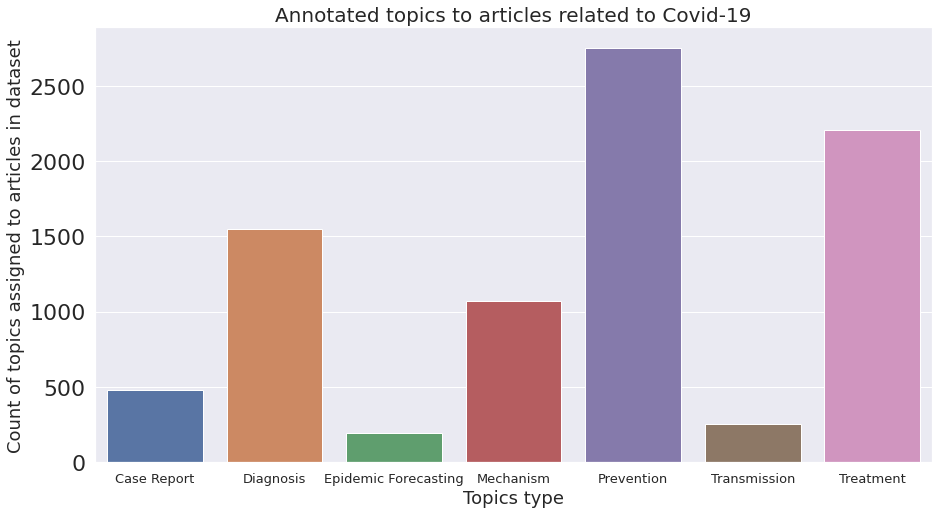

In [ ]:
categories = list(litcovid_dataset.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15, 8))

ax = sns.barplot(categories[9:], litcovid_dataset.iloc[:, 9:].sum().values)

plt.title("Annotated topics to articles related to Covid-19", fontsize=20)
plt.ylabel('Count of topics assigned to articles in dataset', fontsize=18)
plt.xlabel('Topics type', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)

plt.show()

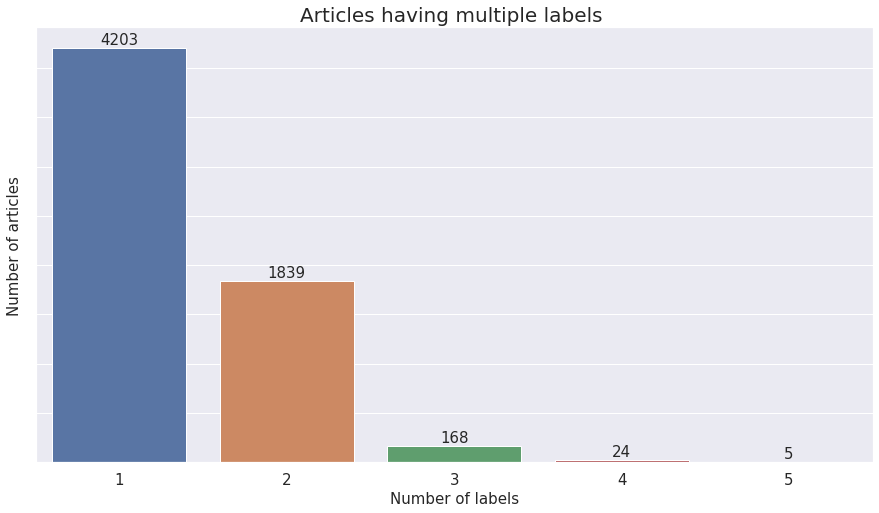

In [ ]:
rowSums = litcovid_dataset.iloc[:,9:].sum(axis=1)

multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Articles having multiple labels ", fontsize=20)
plt.ylabel('Number of articles', fontsize=15)
plt.xlabel('Number of labels', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)

plt.show()

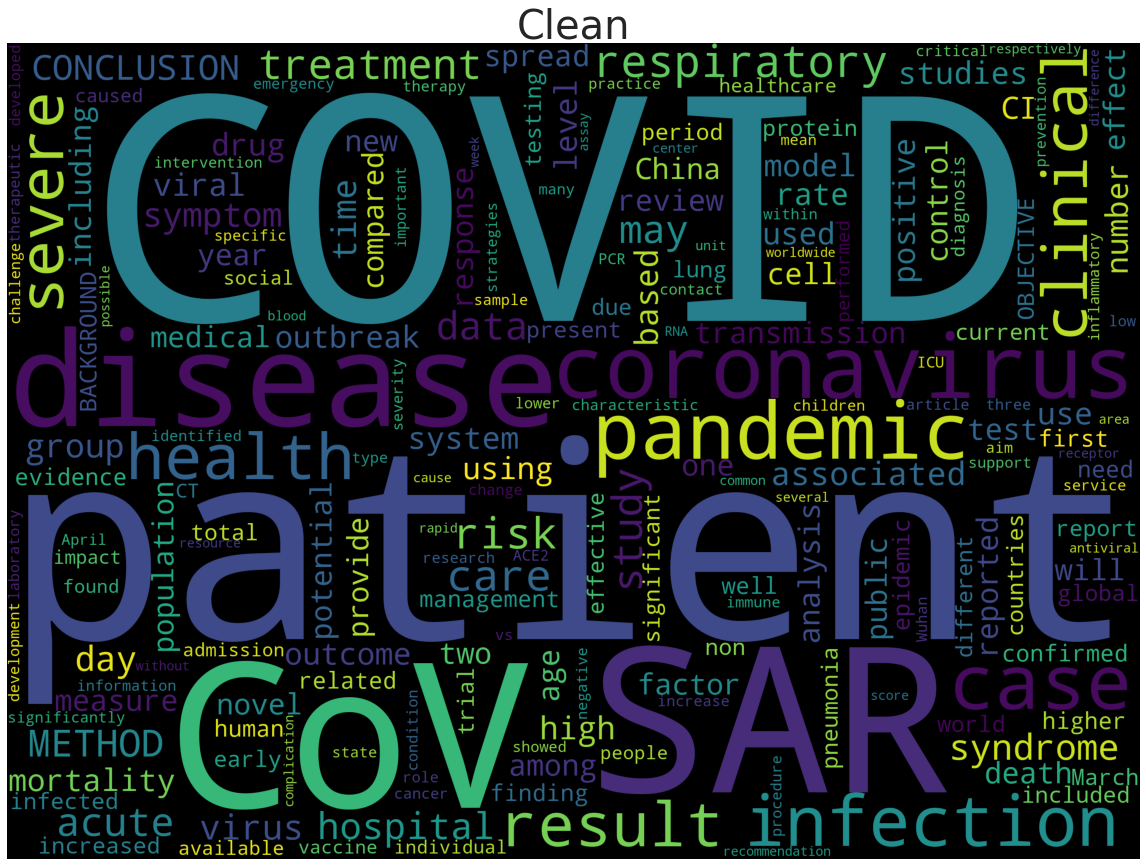

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(30,15))

text = litcovid_dataset.abstract.values
cloud_toxic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)

In [ ]:
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,0,0,1
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,0,0,0,0,1,0,1
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,1,0,0,0,0,0,0
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,0,0,0,0,1,0,0
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,0,0,0,1


In [ ]:
litcovid_dataset.tail()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
24955,32508388,Biol Sport,Medical recommendations for home-confined foot...,"In early 2020, the world is facing a global em...",coronavirus;football;illness;soccer;training,Journal Article;Review,"Eirale, Cristiano;Bisciotti, Giannicola;Corsin...",10.5114/biolsport.2020.94348,Prevention,0,0,0,0,1,0,0
24956,32815519,Diagn Interv Radiol,Determination of disease severity in COVID-19 ...,PURPOSE: Chest X-ray plays a key role in diagn...,NaN,Journal Article,"Blain, Maxime;T Kassin, Michael;Varble, Nicole...",10.5152/dir.2020.20205,Diagnosis,0,1,0,0,0,0,0
24957,32904987,New Microbes New Infect,Baseline electrolyte abnormalities would be re...,Electrolyte abnormalities are not uncommon in ...,coronavirus disease 2019;disease outcome;elect...,Journal Article,"Tezcan, M E;Dogan Gokce, G;Sen, N;Zorlutuna Ka...",10.1016/j.nmni.2020.100753,Treatment;Diagnosis,0,1,0,0,0,0,1
24958,32892181,J Perinat Med,COVID-19 in obstetrics 2020: the experience at...,The global spread of the SARS-CoV-2 virus duri...,covid-19;sars-cov-2;health system resources;ob...,Journal Article;Review,"Dayal, Ashlesha K;Razavi, Armin S;Jaffer, Amir...",10.1515/jpm-2020-0365,Prevention,0,0,0,0,1,0,0
24959,32389144,Disaster Med Public Health Prep,Public Health Communication in Time of Crisis:...,OBJECTIVE: The purpose of this study was to as...,covid-19;on-line information;readability,Journal Article;Review,"Basch, Corey H;Mohlman, Jan;Hillyer, Grace C;G...",10.1017/dmp.2020.151,Prevention,0,0,0,0,1,0,0


In [ ]:
litcovid_dataset = litcovid_dataset.drop(["pmid", "journal", "title", "keywords", "pub_type", "authors", "doi", "label"], axis=1)
litcovid_dataset.head()

,abstract,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,"Studies have shown that infection, excessive c...",0,0,0,0,0,0,1
1,BACKGROUND: Emergence of the coronavirus disea...,0,0,1,0,1,0,0
2,Four decades of neoliberal health policies hav...,0,0,0,0,1,0,0
3,The global SARS-CoV-2 pandemic started late 20...,0,0,0,1,0,0,1
4,The current coronavirus pandemic is an ongoing...,0,0,0,1,0,0,1


In [ ]:
pwd

'/content'

In [ ]:
litcovid_dataset.to_csv(r"/content/drive/MyDrive/Biocreative/Biocreative/datasets/preprocessed_dev.csv", index=False, header=True)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Biocreative/Biocreative/datasets/preprocessed_dev.csv")
df.head()

,abstract,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,"Studies have shown that infection, excessive c...",0,0,0,0,0,0,1
1,BACKGROUND: Emergence of the coronavirus disea...,0,0,1,0,1,0,0
2,Four decades of neoliberal health policies hav...,0,0,0,0,1,0,0
3,The global SARS-CoV-2 pandemic started late 20...,0,0,0,1,0,0,1
4,The current coronavirus pandemic is an ongoing...,0,0,0,1,0,0,1


In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
litcovid_dataset = litcovid_dataset.drop(['pmid', 'journal', 'title', 'keywords', 'pub_type', 'authors', 'doi', 'label'], axis=1)
litcovid_dataset.head()

,abstract,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,"In December 2019, a new and highly contagious ...",0,0,0,1,0,0,1
1,"A novel coronavirus disease (COVID-19), transm...",0,0,0,0,1,0,1
2,"BACKGROUND: In December 2019, the novel corona...",1,0,0,0,0,0,0
3,During the coronavirus disease 2019 (COVID-19)...,0,0,0,0,1,0,0
4,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,0,0,0,0,0,0,1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

data = litcovid_dataset

if not sys.warnoptions:
  warnings.simplefilter("ignore")

def cleanHtml(sentence):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, ' ', str(sentence))
  return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
  cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
  cleaned = cleaned.strip()
  cleaned = cleaned.replace("\n"," ")
  return cleaned

def keepAlpha(sentence):
  alpha_sent = ""
  for word in sentence.split():
      alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
      alpha_sent += alpha_word
      alpha_sent += " "
  alpha_sent = alpha_sent.strip()
  return alpha_sent

data['abstract'] = data['abstract'].str.lower()
data['abstract'] = data['abstract'].apply(cleanHtml)
data['abstract'] = data['abstract'].apply(cleanPunc)
data['abstract'] = data['abstract'].apply(keepAlpha)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['abstract'] = data['abstract'].apply(removeStopWords)

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['abstract'] = data['abstract'].apply(stemming)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
train_text = train['abstract']
test_text = test['abstract']
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['abstract'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['abstract'], axis=1)

In [ ]:
# using one vs rest
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
categories = data.columns[1:]
for category in categories:
  print('**Processing {} comments...**'.format(category))
  
  # Training logistic regression model on train data
  LogReg_pipeline.fit(x_train, train[category])
  
  # calculating test accuracy
  prediction = LogReg_pipeline.predict(x_test)
  print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
  print("\n")

**Processing Case Report comments...**
Test accuracy is 0.936965811965812


**Processing Diagnosis comments...**
Test accuracy is 0.8649839743589743


**Processing Epidemic Forecasting comments...**
Test accuracy is 0.9760950854700855


**Processing Mechanism comments...**
Test accuracy is 0.9027777777777778


**Processing Prevention comments...**
Test accuracy is 0.9290865384615384


**Processing Transmission comments...**
Test accuracy is 0.9595352564102564


**Processing Treatment comments...**
Test accuracy is 0.8735309829059829




In [ ]:
!pip install scikit-multilearn

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy= ", accuracy_score(y_test, predictions))
print("\n")

### experiments

In [ ]:
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment


In [ ]:
titles = litcovid_dataset["title"]
keywords = litcovid_dataset["keywords"]
labels = litcovid_dataset["label"]

In [ ]:
print(f"{titles[0]}\n\n{keywords[0]}\n\n{labels[0]}")

Potential role for tissue factor in the pathogenesis of hypercoagulability associated with in COVID-19.

covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;tissue factor

Treatment;Mechanism


In [ ]:
print(f"{titles[2]}\n\n{keywords[2]}\n\n{labels[2]}")

First report of manic-like symptoms in a COVID-19 patient with no previous history of a psychiatric disorder.

cerebrospinal fluid;igg;manic-like symptoms;sars-cov-2

Case Report


In [ ]:
print(f"{titles[14]}\n\n{keywords[14]}\n\n{labels[14]}")

Magnetic Microdevices for MRI-Based Detection of SARS-CoV-2 Viruses.

covid;mri;coronavirus;magnetic microdevices;theranostic

Diagnosis


In [ ]:
print(f"{titles[18]}\n\n{keywords[18]}\n\n{labels[18]}")

Pattern of early human-to-human transmission of Wuhan 2019 novel coronavirus (2019-nCoV), December 2019 to January 2020.

2019-ncov;wuhan;coronavirus;emerging infectious disease;mathematical modelling

Transmission


In [ ]:
print(f"{titles[26]}\n\n{keywords[26]}\n\n{labels[26]}")

Estimates of serial interval for COVID-19: A systematic review and meta-analysis.

covid-19;epidemiology;meta-analysis;serial interval;systematic review

Transmission;Epidemic Forecasting;Prevention


In [ ]:
df = pd.read_csv('drive/MyDrive/Biocreative/Biocreative/preprocessed_version0.csv')
df.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,0,0,1
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,0,0,0,0,1,0,1
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,1,0,0,0,0,0,0
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,0,0,0,0,1,0,0
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,0,0,0,1


In [ ]:
df = df.fillna(" ")
df.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,0,0,1
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,0,0,0,0,1,0,1
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,1,0,0,0,0,0,0
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,0,0,0,0,1,0,0
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,0,0,0,1


In [ ]:
LABEL_COLUMNS = df.columns[9:].to_list()
print(LABEL_COLUMNS)

['Case Report', 'Diagnosis', 'Epidemic Forecasting', 'Mechanism', 'Prevention', 'Transmission', 'Treatment']


In [ ]:
count = 0
for _, row in df.iterrows():

  title = row["title"]
  keywords = row["keywords"]
  labels = row[LABEL_COLUMNS].to_dict().values()
  if keywords == " ":
    keyword_text = " "
  else:
    keywords = keywords.split(";")
    keyword_text = ' '.join(keywords)
  print(f"{title}::::{keyword_text}::::{list(labels)}")
  if count>10:
    break
  count+=1

Potential role for tissue factor in the pathogenesis of hypercoagulability associated with in COVID-19.::::covid-19 il-6 sars-cov-2 tnf-alpha thrombosis tissue factor::::[0, 0, 0, 1, 0, 0, 1]
Dietary therapy and herbal medicine for COVID-19 prevention: A review and perspective.::::covid-19 coronavirus dietary therapy herbal medicine herbs prevention sars-cov-2::::[0, 0, 0, 0, 1, 0, 1]
First report of manic-like symptoms in a COVID-19 patient with no previous history of a psychiatric disorder.::::cerebrospinal fluid igg manic-like symptoms sars-cov-2::::[1, 0, 0, 0, 0, 0, 0]
Epidemiological Investigation of OHCWs with COVID-19.::::dental education dental public health infection control infectious disease patient outcomes virology::::[0, 0, 0, 0, 1, 0, 0]
The impact of sofosbuvir/daclatasvir or ribavirin in patients with severe COVID-19.:::: ::::[0, 0, 0, 0, 0, 0, 1]
The Coronavirus Disease 2019 Pandemic's Effect on Critical Care Resources and Health-Care Providers: A Global Survey.::::c

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# text preprocessing helper functions
def clean_text(text):

  """ 
  Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.
  """
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  return text


def text_preprocessing(text):

  """
  Cleaning and parsing the text.
  """
  tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
  nopunc = clean_text(text)
  tokenized_text = tokenizer.tokenize(nopunc)
  remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
  combined_text = ' '.join(remove_stopwords)
  return combined_text

In [ ]:
# just title data frame 
df_title = df["title"]

In [ ]:
text = df_title[0]
print(f"before preprocessing: \n{text}")
text = text_preprocessing(text)
print(f"after preprocessing: \n{text}")

before preprocessing: 
Potential role for tissue factor in the pathogenesis of hypercoagulability associated with in COVID-19.
after preprocessing: 
potential role tissue factor pathogenesis hypercoagulability associated covid19


In [ ]:
df_title = df_title.apply(text_preprocessing)

In [ ]:
# keywords dataframe
df_keywords = df["keywords"]
df_keywords.head()

0    covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...
1    covid-19;coronavirus;dietary therapy;herbal me...
2    cerebrospinal fluid;igg;manic-like symptoms;sa...
3    dental education;dental public health;infectio...
4                                                     
Name: keywords, dtype: object

In [ ]:
def preprocess_keywords(keywords):
  
  if keywords == " ":
    keyword_text = " "
  else:
    keywords = keywords.split(';')
    keyword_text = ' '.join(keywords)
  
  return keyword_text 

# apply this method to keywords dataframe
df_keywords = df_keywords.apply(preprocess_keywords)

In [ ]:
# concat titles and keywords
df_result = pd.concat([df_title, df_keywords, df[LABEL_COLUMNS]], axis=1)
df_result.tail()

,title,keywords,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
24955,medical recommendations homeconfined footballe...,coronavirus football illness soccer training,0,0,0,0,1,0,0
24956,determination disease severity covid19 patient...,,0,1,0,0,0,0,0
24957,baseline electrolyte abnormalities would relat...,coronavirus disease 2019 disease outcome elect...,0,1,0,0,0,0,1
24958,covid19 obstetrics 2020 experience new york ci...,covid-19 sars-cov-2 health system resources ob...,0,0,0,0,1,0,0
24959,public health communication time crisis readab...,covid-19 on-line information readability,0,0,0,0,1,0,0


In [ ]:
%cd drive/MyDrive/Biocreative/Biocreative/datasets/

/content/drive/MyDrive/Biocreative/Biocreative/datasets


In [ ]:
df_result1 = df_result.drop(["keywords"], axis=1)
df_result1.head()

,title,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,potential role tissue factor pathogenesis hype...,0,0,0,1,0,0,1
1,dietary therapy herbal medicine covid19 preven...,0,0,0,0,1,0,1
2,first report maniclike symptoms covid19 patien...,1,0,0,0,0,0,0
3,epidemiological investigation ohcws covid19,0,0,0,0,1,0,0
4,impact sofosbuvirdaclatasvir ribavirin patient...,0,0,0,0,0,0,1


In [ ]:
# Save version 1
df_result1.to_csv("title.csv", index=False)

In [ ]:
title_keyword = []
for _, row in df_result.iterrows():
  
  title = row["title"]
  keywords = row["keywords"]
  result_string = f"{title} {keywords}".strip()

  title_keyword.append(result_string)
  
title_keyword[:5]

['potential role tissue factor pathogenesis hypercoagulability associated covid19 covid-19 il-6 sars-cov-2 tnf-alpha thrombosis tissue factor',
 'dietary therapy herbal medicine covid19 prevention review perspective covid-19 coronavirus dietary therapy herbal medicine herbs prevention sars-cov-2',
 'first report maniclike symptoms covid19 patient previous history psychiatric disorder cerebrospinal fluid igg manic-like symptoms sars-cov-2',
 'epidemiological investigation ohcws covid19 dental education dental public health infection control infectious disease patient outcomes virology',
 'impact sofosbuvirdaclatasvir ribavirin patients severe covid19']

In [ ]:
# Save version 2
df_tk = pd.DataFrame(title_keyword, columns=["Title_keywords"])
df_tk.head()

,Title_keywords
0,potential role tissue factor pathogenesis hype...
1,dietary therapy herbal medicine covid19 preven...
2,first report maniclike symptoms covid19 patien...
3,epidemiological investigation ohcws covid19 de...
4,impact sofosbuvirdaclatasvir ribavirin patient...


In [ ]:
# concat title_keyword and labels
df_result2 = pd.concat([df_tk, df[LABEL_COLUMNS]], axis=1)
df_result2.head()

,Title_keywords,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,potential role tissue factor pathogenesis hype...,0,0,0,1,0,0,1
1,dietary therapy herbal medicine covid19 preven...,0,0,0,0,1,0,1
2,first report maniclike symptoms covid19 patien...,1,0,0,0,0,0,0
3,epidemiological investigation ohcws covid19 de...,0,0,0,0,1,0,0
4,impact sofosbuvirdaclatasvir ribavirin patient...,0,0,0,0,0,0,1


In [ ]:
# save file
df_result2.to_csv("title_keyword.csv", index=False)

In [ ]:
df_result1.shape, df_result2.shape

((24960, 8), (24960, 8))

### title + abstract + keywords

In [1]:
import pandas as pd

In [85]:
df1 = pd.read_csv('drive/MyDrive/Biocreative/Biocreative/preprocessed_version0.csv')
df1.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,0,0,1
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,0,0,0,0,1,0,1
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,1,0,0,0,0,0,0
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,0,0,0,0,1,0,0
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,0,0,0,1


In [86]:
df1 = df1.drop(["pmid", "journal", "pub_type", "authors", "doi", "label"], axis=1)
df1.head()

,title,abstract,keywords,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,0,0,0,1,0,0,1
1,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,0,0,0,0,1,0,1
2,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,1,0,0,0,0,0,0
3,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,0,0,0,0,1,0,0
4,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,0,0,0,0,0,0,1


In [100]:
df2 = pd.read_csv('drive/MyDrive/Biocreative/Biocreative/datasets/preprocessed_dev.csv')
df2.head()

,title,abstract,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment,keywords
0,Potential benefits and risks of omega-3 fatty ...,"Studies have shown that infection, excessive c...",0,0,0,0,0,0,1,dha;epa;inflammation;oxidative stress;sars-cov...
1,Modeling COVID-19 Latent Prevalence to Assess ...,BACKGROUND: Emergence of the coronavirus disea...,0,0,1,0,1,0,0,covid-19;sir model;detection probability;forec...
2,The U.S. Health Care System on the Eve of the ...,Four decades of neoliberal health policies hav...,0,0,0,0,1,0,0,covid-19;united states;health care;health ineq...
3,High-Throughput Screening for Inhibitors of th...,The global SARS-CoV-2 pandemic started late 20...,0,0,0,1,0,0,1,3clpro;covid-19;sars-cov-2;apomorphine;aporphi...
4,COVID-19 and immunomodulation in IBD.,The current coronavirus pandemic is an ongoing...,0,0,0,1,0,0,1,cytokines;inflammation;inflammatory bowel disease


In [101]:
df = pd.concat([df1, df2], axis=0)
df.shape

(31199, 10)

In [102]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,abstract,keywords,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,Rapid Serological Assays and SARS-CoV-2 Real-T...,BACKGROUND: Real-time polymerase chain reactio...,covid-19;rt-pcr;sars-cov-2;serological test,0,1,0,0,0,0,0
1,Coronavirus Disease (COVID-19) and the Gastroi...,Severe acute respiratory syndrome coronavirus ...,NaN,0,0,0,0,1,0,0
2,Recommendations for Prevention and Control of ...,This statement updates the recommendations of ...,NaN,0,0,0,0,1,0,1
3,Takotsubo Syndrome in the Setting of COVID-19.,A 58-year-old woman was admitted with symptoms...,"covid-19;covid-19, coronavirus disease-2019;ec...",1,0,0,0,0,0,0
4,Severe Rhabdomyolysis in a 35-Year-old Woman w...,BACKGROUND Rhabdomyolysis is a skeletal muscle...,NaN,1,0,0,0,0,0,0


In [107]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
# fill null values
df = df.fillna("")

In [110]:
df.head()

,title,abstract,keywords,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,Rapid Serological Assays and SARS-CoV-2 Real-T...,BACKGROUND: Real-time polymerase chain reactio...,covid-19;rt-pcr;sars-cov-2;serological test,0,1,0,0,0,0,0
1,Coronavirus Disease (COVID-19) and the Gastroi...,Severe acute respiratory syndrome coronavirus ...,,0,0,0,0,1,0,0
2,Recommendations for Prevention and Control of ...,This statement updates the recommendations of ...,,0,0,0,0,1,0,1
3,Takotsubo Syndrome in the Setting of COVID-19.,A 58-year-old woman was admitted with symptoms...,"covid-19;covid-19, coronavirus disease-2019;ec...",1,0,0,0,0,0,0
4,Severe Rhabdomyolysis in a 35-Year-old Woman w...,BACKGROUND Rhabdomyolysis is a skeletal muscle...,,1,0,0,0,0,0,0


In [111]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def waste_word_removal(text):

  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

  word_tokens = word_tokenize(text)

  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

  lemm_list = [lemmatizer.lemmatize(word) for word in filtered_sentence]

  new_text = ' '.join(lemm_list)

  for ele in new_text:
    if ele in punc:
      new_text = new_text.replace(ele, "")

  text_ = ' '.join(new_text.split())

  return text_

In [112]:
df_title = df["title"]
df_Title = df_title.apply(waste_word_removal)
df_Title.head()

0    Rapid Serological Assays SARSCoV2 RealTime Pol...
1    Coronavirus Disease COVID19 Gastrointestinal S...
2    Recommendations Prevention Control Influenza C...
3                   Takotsubo Syndrome Setting COVID19
4    Severe Rhabdomyolysis 35Yearold Woman COVID19 ...
Name: title, dtype: object

In [113]:
df_abstract = df["abstract"]
df_Abstract = df_abstract.apply(waste_word_removal)
df_Abstract.head()

0    BACKGROUND Realtime polymerase chain reaction ...
1    Severe acute respiratory syndrome coronavirus ...
2    statement update recommendation American Acade...
3    58yearold woman admitted symptom coronavirus d...
4    BACKGROUND Rhabdomyolysis skeletal muscle inju...
Name: abstract, dtype: object

In [114]:
def concat_keywords(text):

  keyword_list = text.split(';')

  if len(keyword_list) > 0:
    keyword_text = " ".join(keyword_list)

  return keyword_text.strip()

In [115]:
df_keyword = df["keywords"]
df_keyword = df_keyword.fillna('')
df_Keyword = df_keyword.apply(concat_keywords)
df_Keyword.head()

0          covid-19 rt-pcr sars-cov-2 serological test
1                                                     
2                                                     
3    covid-19 covid-19, coronavirus disease-2019 ec...
4                                                     
Name: keywords, dtype: object

In [118]:
#  concat title, abstract and keywords
df_outer = df_Title + ". " + df_Abstract + ". " + df_Keyword

In [128]:
df_outer = pd.DataFrame(df_outer, columns=["abstract"])
df_outer.head()

,abstract
0,Rapid Serological Assays SARSCoV2 RealTime Pol...
1,Coronavirus Disease COVID19 Gastrointestinal S...
2,Recommendations Prevention Control Influenza C...
3,Takotsubo Syndrome Setting COVID19. 58yearold ...
4,Severe Rhabdomyolysis 35Yearold Woman COVID19 ...


In [129]:
df_main = pd.concat([df_outer, df[df.columns[3:]]], axis=1)
df_main.shape

(31199, 6)

In [130]:
df_main.head()

,abstract,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,Rapid Serological Assays SARSCoV2 RealTime Pol...,0,0,0,0,0
1,Coronavirus Disease COVID19 Gastrointestinal S...,0,0,1,0,0
2,Recommendations Prevention Control Influenza C...,0,0,1,0,1
3,Takotsubo Syndrome Setting COVID19. 58yearold ...,0,0,0,0,0
4,Severe Rhabdomyolysis 35Yearold Woman COVID19 ...,0,0,0,0,0


In [131]:
# save concatenated dataset
df_main.to_csv("drive/MyDrive/Biocreative/Biocreative/Concatenated_data.csv", index=False, header=True)

In [132]:
# load data
df = pd.read_csv("drive/MyDrive/Biocreative/Biocreative/Concatenated_data.csv")
df.head()

,abstract,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,Rapid Serological Assays SARSCoV2 RealTime Pol...,0,0,0,0,0
1,Coronavirus Disease COVID19 Gastrointestinal S...,0,0,1,0,0
2,Recommendations Prevention Control Influenza C...,0,0,1,0,1
3,Takotsubo Syndrome Setting COVID19. 58yearold ...,0,0,0,0,0
4,Severe Rhabdomyolysis 35Yearold Woman COVID19 ...,0,0,0,0,0
